<a href="https://www.kaggle.com/code/bcexpt1123/handwritten-simple?scriptVersionId=284817235" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Creating a simple neural network from scratch in Python to extract information from handwritten images requires several steps. Below, I'll guide you through building a basic feedforward neural network without using any external libraries. This example will be simplified and won't achieve state-of-the-art results, but it will illustrate the basic principles of neural networks.

### Step 1: Define the Structure of the Neural Network

We'll start with a simple structure:
- Input Layer: The size will depend on the image size (e.g., 28x28 pixels for MNIST images, which is 784 neurons).
- Hidden Layer: Let's have one hidden layer with a certain number of neurons (e.g., 128).
- Output Layer: For digit classification (0-9), this will have 10 neurons.

### Step 2: Initialize Weights and Biases

Weights and biases need to be initialized for each layer. We'll use small random numbers for the weights and zeros for the biases.

### Step 3: Activation Function

We'll use the sigmoid activation function. The sigmoid function is defined as:

\[ \sigma(x) = \frac{1}{1 + e^{-x}} \]

### Step 4: Forward Propagation

This is the process of passing inputs through the network to get outputs.

### Step 5: Loss Function

We'll use binary cross-entropy as our loss function, which measures the difference between actual and predicted values.

### Step 6: Backpropagation

This is how we update weights based on the error calculated from the loss function.

### Step 7: Training the Network

Train the network using multiple iterations (epochs) over the dataset.


### Explanation of Key Steps

1. **Model Structure**: We defined a feedforward neural network with one hidden layer.
2. **Activation Function**: We used the sigmoid function, which squashes inputs to a range between 0 and 1.
3. **Forward Propagation**: Inputs are fed through the network to produce outputs.
4. **Backpropagation**: We calculated the error and adjusted weights to minimize this error using gradient descent.

### Limitations

This code is a basic implementation and lacks optimizations and features needed for real-world use. No pre-processing of images or advanced techniques (like convolutional layers) are considered here. For serious machine learning tasks, it's recommended to use libraries like TensorFlow or PyTorch.

In [5]:
import numpy as np
# import cupy as np
import matplotlib.pyplot as plt
from os.path import join
import struct
from array import array

In [6]:
#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath, training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):
        # Read labels
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = np.frombuffer(file.read(), dtype=np.uint8)  # Read labels into a NumPy array

        # Read images
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = np.frombuffer(file.read(), dtype=np.uint8)  # Read image data into a NumPy array

        # Reshape images
        images = image_data.reshape(size, rows, cols)  # Reshape to (num_images, height, width)

        return images, labels  # Return as NumPy arrays
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train), (x_test, y_test)   

# Example usage
# Create an instance of the data loader with the file paths for training and testing datasets.
# Note: Make sure to set the correct paths for your MNIST dataset files.
# dataloader = MnistDataloader('train-images.idx3-ubyte', 'train-labels.idx1-ubyte', 't10k-images.idx3-ubyte', 't10k-labels.idx1-ubyte')
# (x_train, y_train), (x_test, y_test) = dataloader.load_data()



In [7]:
def one_hot_encode(indices, total_size = 10):
    """
    Convert a list of integer indices to a one-hot encoded matrix, filling with zeros to a specified total size.
    
    :param indices: List of integer indices.
    :param total_size: The total number of categories for one-hot encoding.
    :return: One-hot encoded numpy array.
    """
    one_hot_matrix = np.zeros((len(indices), total_size), dtype=int)

    for i, index in enumerate(indices):
        if 0 <= index < total_size:
            one_hot_matrix[i, index] = 1  # Set the appropriate index to 1

    return one_hot_matrix

def one_hot_decode(one_hot_matrix):
    """
    Convert a one-hot encoded numpy array back to the original list of indices.
    
    :param one_hot_matrix: One-hot encoded numpy array.
    :return: List of integer indices.
    """
    indices = np.argmax(one_hot_matrix, axis=1)  # Get the index of the maximum value in each row
    return indices.tolist()

# Example usage
indices = [3, 6, 4]
total_size = 10  # Total number of categories
one_hot_encoded = one_hot_encode(indices, total_size)
print("Encoded:\n", one_hot_encoded)

decoded_indices = one_hot_decode(one_hot_encoded)
print("Decoded:", decoded_indices)

Encoded:
 [[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
Decoded: [3, 6, 4]


Epoch 0, Loss: 1.0168039225933345
Epoch 10, Loss: 0.21810549806503896
Epoch 20, Loss: 0.08141755261840593
Epoch 30, Loss: 0.025713299337008468
Epoch 40, Loss: 0.039046582475070216
Test Accuracy: 94.81%


<Figure size 1200x1000 with 0 Axes>

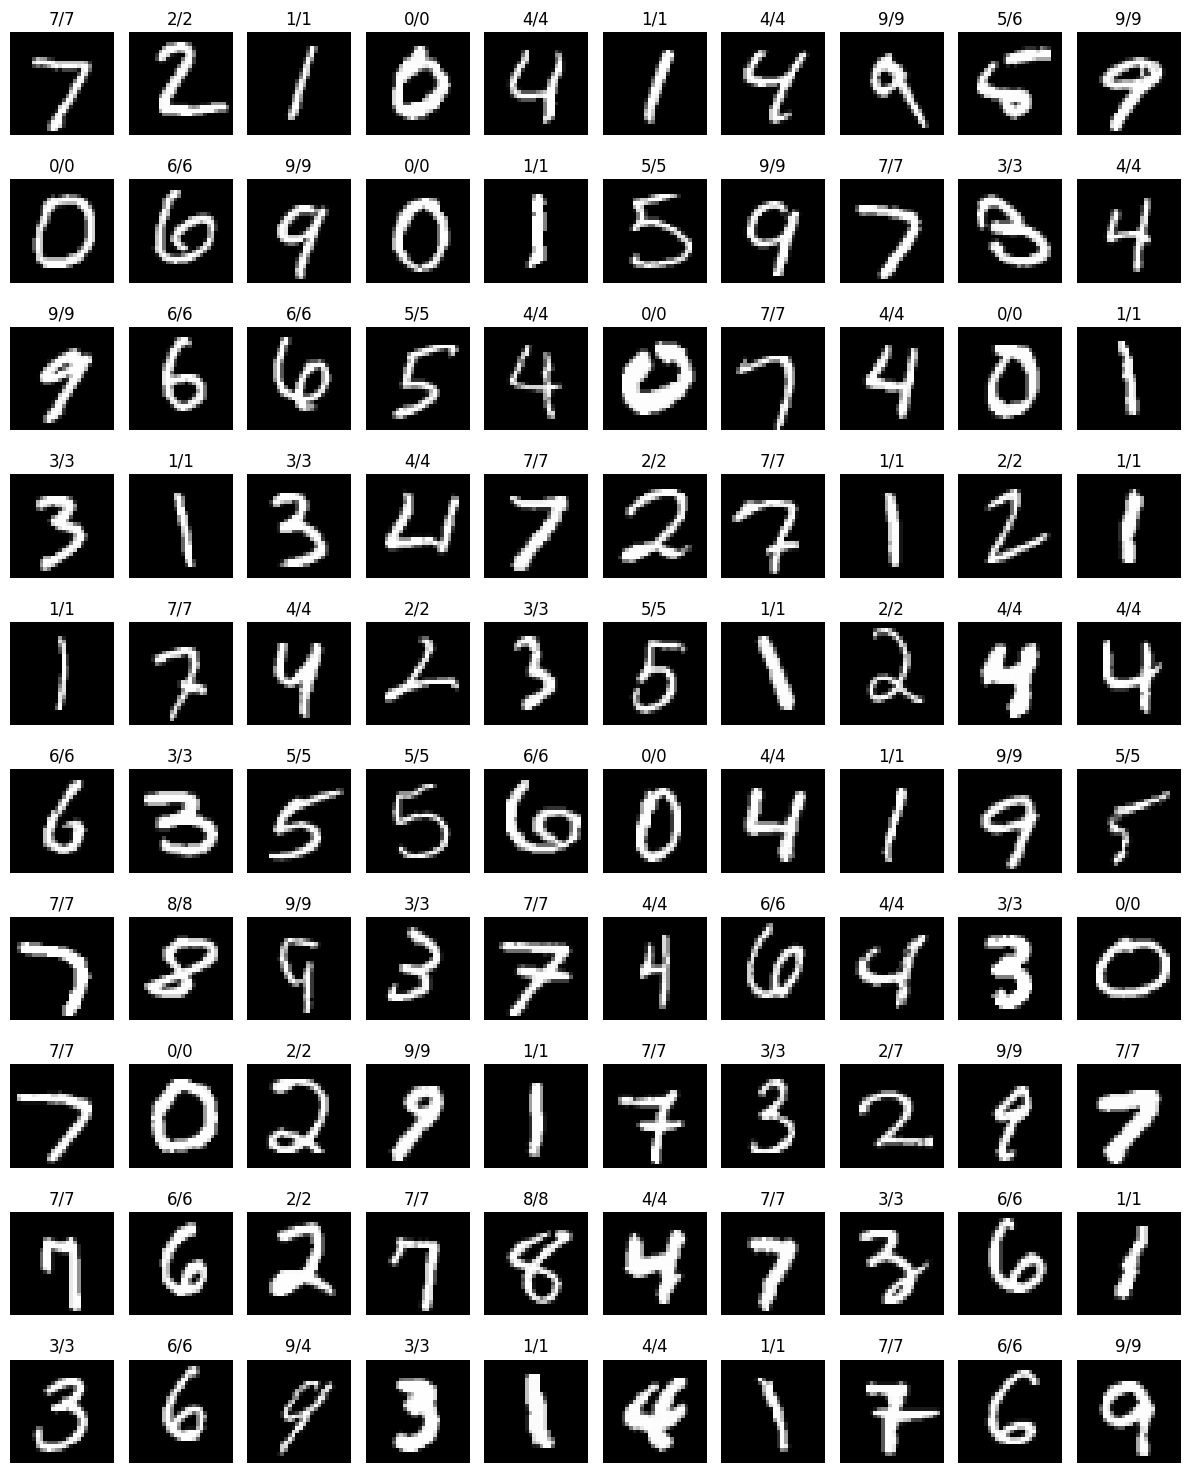

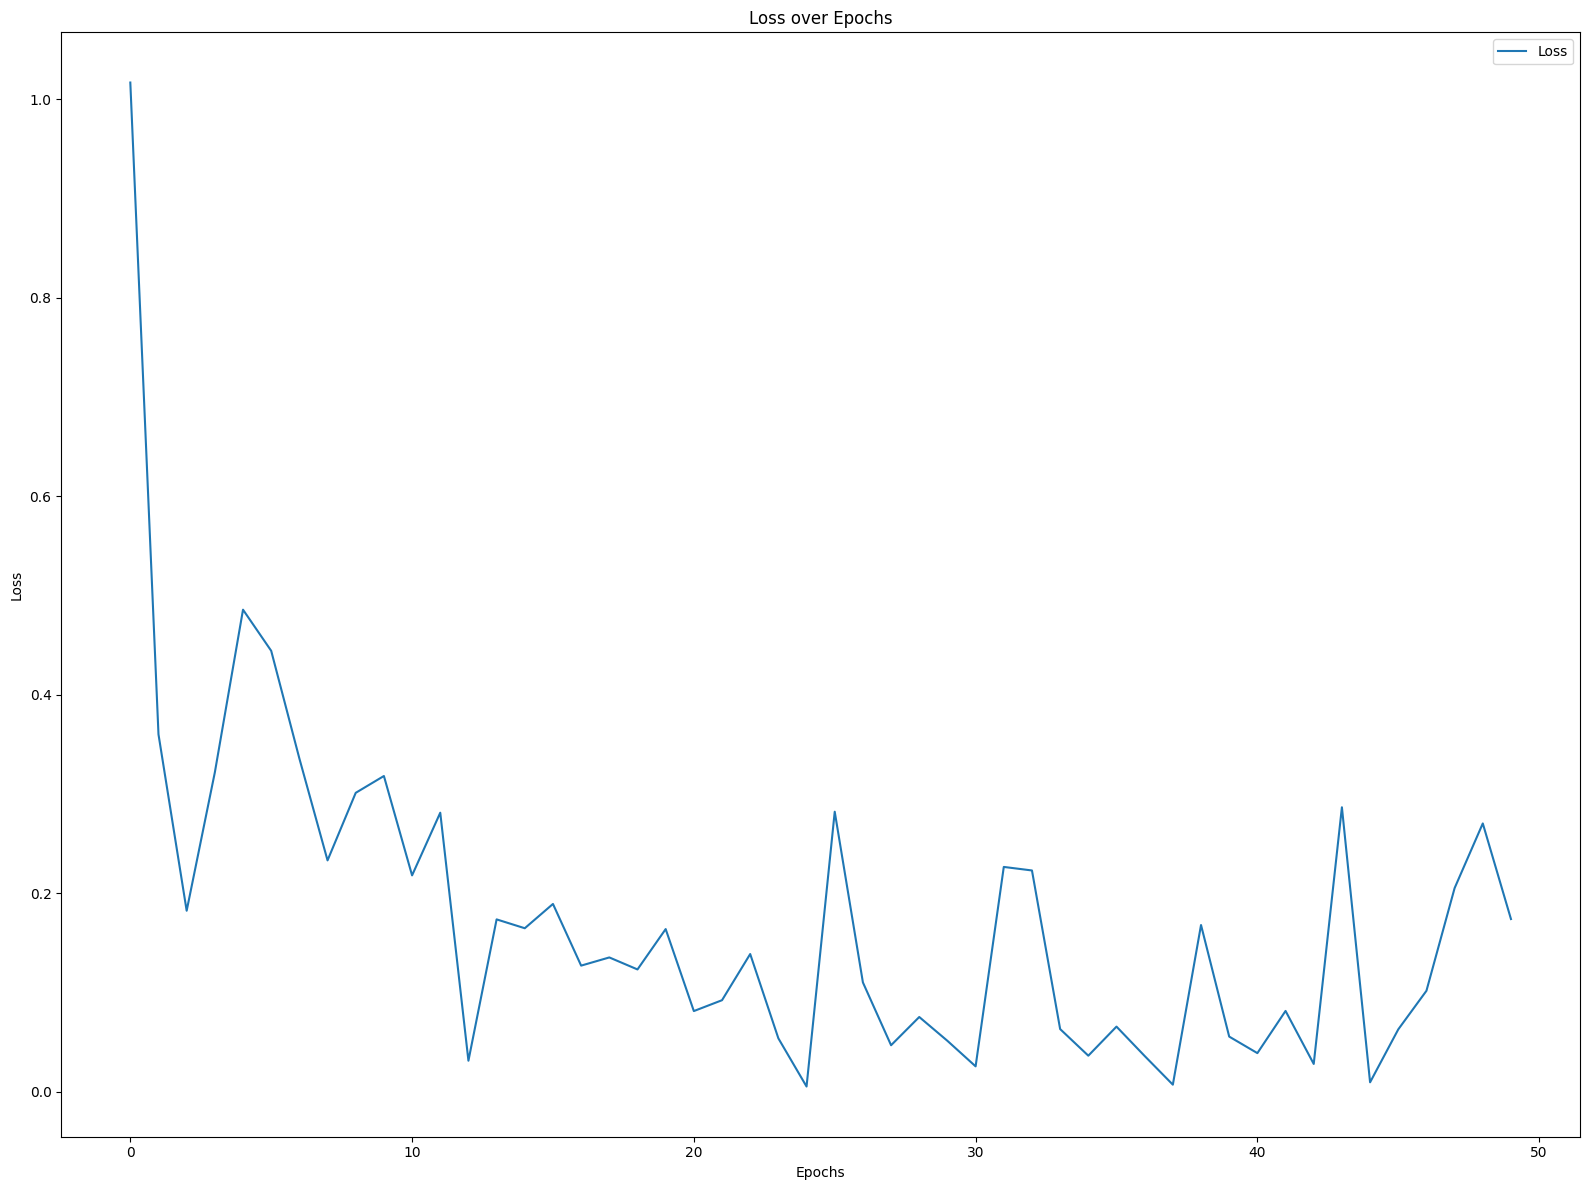

In [8]:

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1. - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp / np.sum(exp, axis=1, keepdims=True)

input_size = 784
hidden_size = 128
output_size = 10

weights_input_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
weights_hidden_output = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
bias_hidden = np.zeros(hidden_size)
bias_output = np.zeros(output_size)


# Collecting training metrics
loss_history = []

def forward_propagation(X):
    global weights_input_hidden, weights_hidden_output, bias_hidden, bias_output
    
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = relu(hidden_input)

    output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    output = softmax(output_input)

    return output, hidden_output, hidden_input

def loss_function(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-15), axis=1))
    
def backpropagation(X, y_true, y_pred, hidden_output, hidden_input, learning_rate=0.001):
    global weights_input_hidden, weights_hidden_output, bias_hidden, bias_output
    # Softmax + CrossEntropy derivative
    output_delta = (y_pred - y_true) / X.shape[0]
    # Hidden layer error
    hidden_error = np.dot(output_delta, weights_hidden_output.T)
    hidden_delta = hidden_error * relu_derivative(hidden_input)
    
    # Update
    weights_hidden_output -= learning_rate * np.dot(hidden_output.T, output_delta)
    weights_input_hidden -= learning_rate * np.dot(X.T, hidden_delta)
    bias_output -= learning_rate * np.sum(output_delta, axis=0)
    bias_hidden -= learning_rate * np.sum(hidden_delta, axis=0)
def train(X, y, epochs, batch_size=64, learning_rate = 0.001):
    n = X.shape[0]
    for epoch in range(epochs):
        # Shuffle
        idx = np.random.permutation(n)
        X = X[idx]
        y = y[idx]
        
        for i in range(0, n, batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            y_pred, hidden_output, hidden_input = forward_propagation(X_batch)
            loss = loss_function(y_batch, y_pred)
            backpropagation(X_batch, y_batch, y_pred, hidden_output, hidden_input, learning_rate)
        loss = loss_function(y_batch, y_pred)
        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

def test(X, y):
    # Forward pass
    y_pred, *_ = forward_propagation(X)
    loss = loss_function(y, y_pred)

    # Convert predicted outputs → predicted class index
    predicted_labels = np.argmax(y_pred, axis=1)

    # Convert one-hot true labels → class index
    true_labels = np.argmax(y, axis=1)

    # Accuracy
    accuracy = np.mean(predicted_labels == true_labels)

    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    img_count = 10  # Number of images in each row
    img_lines = 10  # Number of rows for the images
    plt.figure(figsize=(12, 10))  # This controls the overall size of the figure
    fig, axs = plt.subplots(img_lines, img_count, figsize=(12, img_lines * 1.5))  # Adjust size dynamically based on img_lines
    
    # Ensure your input has at least img_lines * img_count images
    total_images = min(len(X), img_lines * img_count)
    
    for i, ax in enumerate(axs.flat):
        if i < total_images:  # Show images only up to the total available count
            label = f"{true_labels[i]}/{predicted_labels[i]}"
            ax.imshow(X[i].reshape(28, 28), cmap='gray')  # Ensure grayscale for MNIST
            ax.set_title(label)
            ax.axis('off')  # Hide axis ticks and labels for cleaner image display
        else:
            ax.axis('off')  # Turn off any additional subplots not being used
    
    plt.tight_layout()
    plt.show()

    return accuracy

def plot_training_status():
    plt.figure(figsize=(16, 12))

    # Plot Loss
    plt.subplot(1, 1, 1)
    plt.plot(loss_history, label='Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()



input_path = '/kaggle/input/mnist-dataset'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')


mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

train(x_train, y_train, epochs=50)
test(x_test, y_test)

# Plot the training status
plot_training_status()